Dataset Preview:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

Grouped Data Summary:
   version  retention1_mean  retention1_count  retention7_mean  \
0  gate_30         0.448188             44700         0.190201   
1  gate_40         0.442283             45489         0.182000   

   retention7_count  
0             44700  
1             45489  

Starting Bayesian analysis for 1-day retention...


Initializing NUTS using jitter+adapt_diag...
c:\Users\mouza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p_treatment]


c:\Users\mouza\AppData\Local\Programs\Python\Python312\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.
Initializing NUTS using jitter+adapt_diag...



Starting Bayesian analysis for 7-day retention...


c:\Users\mouza\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p_treatment]


c:\Users\mouza\AppData\Local\Programs\Python\Python312\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 24 seconds.



Summarizing results for 1-day retention:
                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
diff_retention_1 -0.006  0.003  -0.012    0.001        0.0      0.0    7492.0   

                  ess_tail  r_hat  
diff_retention_1    5478.0    1.0  

Summarizing results for 7-day retention:
                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
diff_retention_7 -0.008  0.003  -0.013   -0.003        0.0      0.0    9433.0   

                  ess_tail  r_hat  
diff_retention_7    6056.0    1.0  

Visualizing posterior distributions...


<Axes: title={'center': 'diff_retention_7'}>

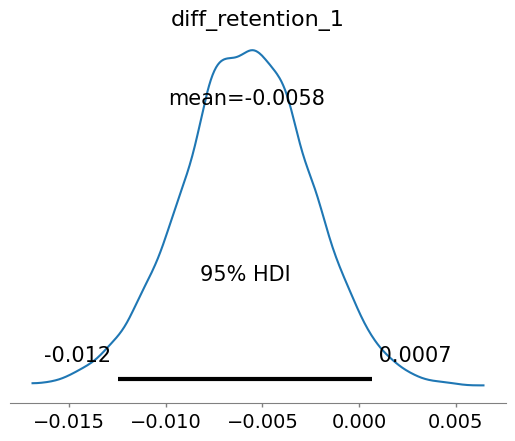

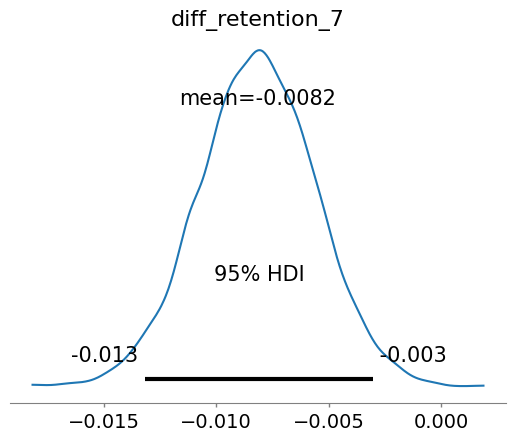

In [3]:
import pandas as pd
import pymc as pm
import arviz as az

# Load the dataset
url = "https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv"
data = pd.read_csv(url)

# Preview the data
print("Dataset Preview:")
print(data.head())

# Group and summarize the data
grouped_data = data.groupby('version').agg(
    retention1_mean=('retention_1', 'mean'),
    retention1_count=('retention_1', 'count'),
    retention7_mean=('retention_7', 'mean'),
    retention7_count=('retention_7', 'count')
).reset_index()

# Display group statistics
print("\nGrouped Data Summary:")
print(grouped_data)

# Bayesian Analysis for 1-day retention
print("\nStarting Bayesian analysis for 1-day retention...")
with pm.Model() as retention1_model:
    # Priors for probabilities
    p_control = pm.Beta("p_control", alpha=1, beta=1)
    p_treatment = pm.Beta("p_treatment", alpha=1, beta=1)

    # Observed data
    control_data = data[data['version'] == 'gate_30']['retention_1']
    treatment_data = data[data['version'] == 'gate_40']['retention_1']
    obs_control = pm.Binomial("obs_control", n=len(control_data), p=p_control, observed=control_data.sum())
    obs_treatment = pm.Binomial("obs_treatment", n=len(treatment_data), p=p_treatment, observed=treatment_data.sum())

    # Calculate the difference in probabilities
    diff_retention1 = pm.Deterministic("diff_retention_1", p_treatment - p_control)

    # Run sampling
    retention1_trace = pm.sample(2000, return_inferencedata=True)

# Bayesian Analysis for 7-day retention
print("\nStarting Bayesian analysis for 7-day retention...")
with pm.Model() as retention7_model:
    # Priors for probabilities
    p_control = pm.Beta("p_control", alpha=1, beta=1)
    p_treatment = pm.Beta("p_treatment", alpha=1, beta=1)

    # Observed data
    control_data = data[data['version'] == 'gate_30']['retention_7']
    treatment_data = data[data['version'] == 'gate_40']['retention_7']
    obs_control = pm.Binomial("obs_control", n=len(control_data), p=p_control, observed=control_data.sum())
    obs_treatment = pm.Binomial("obs_treatment", n=len(treatment_data), p=p_treatment, observed=treatment_data.sum())

    # Calculate the difference in probabilities
    diff_retention7 = pm.Deterministic("diff_retention_7", p_treatment - p_control)

    # Run sampling
    retention7_trace = pm.sample(2000, return_inferencedata=True)

# Summarize and Visualize Results
print("\nSummarizing results for 1-day retention:")
summary_retention1 = az.summary(retention1_trace, var_names=["diff_retention_1"])
print(summary_retention1)

print("\nSummarizing results for 7-day retention:")
summary_retention7 = az.summary(retention7_trace, var_names=["diff_retention_7"])
print(summary_retention7)

# Plot posterior distributions for 1-day and 7-day retention differences
print("\nVisualizing posterior distributions...")
az.plot_posterior(retention1_trace, var_names=["diff_retention_1"], hdi_prob=0.95)
az.plot_posterior(retention7_trace, var_names=["diff_retention_7"], hdi_prob=0.95)
